<div class="alert alert-block alert-info">

**Accessibility of the notebook:**
- You can adjust the width of the text with the function provided below. Copy it into a new code cell and execute it using the `ipykernel`.
    ```python
    from IPython.core.display import HTML
    def set_width(width):
        display(HTML(f"""<style>  
                .container {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} 
                .jp-Cell {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} </style>"""))
    # Set container width to X% of the fullscreen 
    set_width(50)
    ```
- You can toggle the auto-numbering of the sections in the outline toolbox (sidebar or topbar).
- You can toggle the code line numbers in the dropdown menu of the "view" button in the topbar. 
- You can collapse/expand a cell by clicking the blue bar on the left side of the cell.

</div>

In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

Experiments of this week:
- experiment 6A: use NI-DAQ to acquire and create digital signals
- experiment 6B: use PicoPI to create a visual Morse signal and observe digital signals
- experiment 6C: program your Alpaca using a mix of digital inputs and outputs

Goal: learn how to work with digital signals with NIDAQ and Alpaca

Structure of an experiment:
- Anticipe + Simulate (10+15+30): per person. This is homework and should be finished **before** you start your 4 hours practicum session
- Implement + Investigate (10+10+5+40): with your partner (group of 2)
- Compare + Conclude(10): with a group of 4 (per table)

# 6B: controling Alpaca using logical signals
> <font color='blue'>Learning goal:</font> Understand how digital inputs and outputs work in Alpaca and learn how to use them in practice, to make the picopi's led send out a Morse signal

## BACKGROUND
> <font color='grey'>⏳ Estimated time: 10 min</font>

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_7_digital out.jpg" width=35% style="float:right"></img>
**Theory:** Now that we are connected to the ALPACA, you can explore **digital output**. By using the digital output function of the ALPACA, the voltages of the `Dout` pins (0-3) can be individually set to either 0 or +5 volts. Programming the ALPACA to this end is done as follows:

```python
from machine import Pin
Dout0 = Pin(14, Pin.OUT) # Dout0 = GP14, hence id=14. The "Dout0" is easy to remember

Dout.value(True) # Set pin to +5V

Dout.value(False) # Set pin to 0V
```

Here, `Dout0` is the name given to the pin. We chose the name `Dout0` because it is easy to remember: it is written on the Cria. Notice that in the second line, we see a mysterious number.`14` is the pin number. This number specifies which pin to turn on or off. **You can find the pin number by looking at the Cria board**: notice that each `DoutX` is followed by the text `GPXX`, the pin number corresponds to whatever number follows `GP`. 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_3_built-in-LED.jpg" width=10% style="float:right"></img>


**Theory:** Besides digital output, the Alpaca also supports **digital input**. This means that the ALPACA can sense whether or not a pin is raised to a "high" value of +5 volts (On) or a "low" value of 0 volts (Off). This is done in a similar fashion as digital output, but instead with `Pin.IN`. Consider the example below:

```python
from machine import Pin
pin_assignment = Pin(id, Pin.IN)
```
For example, if the pin is to control a button connected to `Din0`, you might want to have the following code.
```python
button= Pin(18, Pin.IN) # Din0 equals GP18, hence id=18. The name button is easy to remember
```
To read out and assign the value to a variable:
```python
isPressed = button.value()
```



## BACKGROUND Morse
> <font color='grey'>⏳ Estimated time: 15 min</font>

First connect the alpaca (otherwise the alpaca kernel cannot run). Then check the out the short preview: after this assignment your ALPACA might be doing this. Can you get what the text is?


In [1]:
# the alpaca kernel needs an alpaca connected 
%serialconnect to --port="COM3" 

import time
import numpy as np
import matplotlib.pyplot as plt

Connecting to --port=COM3 --baud=115200 

Are you sure your ESP-device is plugged in?

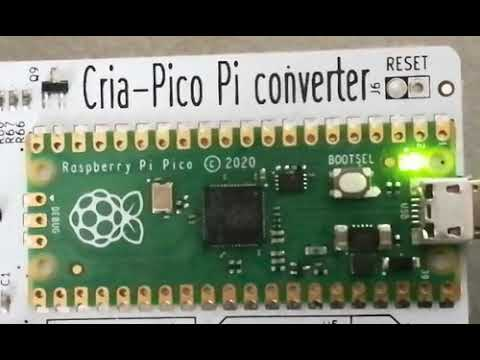

In [1]:
%python 
#recording
from IPython.lib.display import YouTubeVideo
YouTubeVideo('k9klfdjLxHE', width = 600, height = 450)
# if the youtube movie does not show, you can always go to https://www.youtube.com/watch?v=k9klfdjLxHE

For the morse code, you are going to re-use code found online. Note that you do not need to understand the details of the given code, but you should feel comfortable using it.

In [2]:
%p
# from https://www.geeksforgeeks.org/morse-code-translator-python/

# Dictionary representing the morse code chart #dict will be explained in later courses, just use the code for now
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...',
                    'C':'-.-.', 'D':'-..', 'E':'.',
                    'F':'..-.', 'G':'--.', 'H':'....',
                    'I':'..', 'J':'.---', 'K':'-.-',
                    'L':'.-..', 'M':'--', 'N':'-.',
                    'O':'---', 'P':'.--.', 'Q':'--.-',
                    'R':'.-.', 'S':'...', 'T':'-',
                    'U':'..-', 'V':'...-', 'W':'.--',
                    'X':'-..-', 'Y':'-.--', 'Z':'--..',
                    '1':'.----', '2':'..---', '3':'...--',
                    '4':'....-', '5':'.....', '6':'-....',
                    '7':'--...', '8':'---..', '9':'----.',
                    '0':'-----', ', ':'--..--', '.':'.-.-.-',
                    '?':'..--..', '/':'-..-.', '-':'-....-',
                    '(':'-.--.', ')':'-.--.-'}


No serial connected
  %serialconnect to connect
  %esptool to flash the device
  %lsmagic to list commands

The next code changes the spaces between letters and words into 'l' and 'w'. You need the pausing time between letters and words to be different: 'l' is used in between letters of the same word, 'w' is used to seperate words. 

In [1]:
# adapted from https://stackoverflow.com/questions/28142019/python-morse-code-pausing
def encodeMessage(m):
    print(m)
    message = m.upper().strip() #string.upper() converts all lowercase characters to uppercase.
                                #string.strip() removes spaces at begin and end of the string
        
    encodedMessage =''          # start as empty string
    isInWord = False

    for ch in message:          # loop over all letters, ch stands for character
       
        if isInWord:
            if ch in MORSE_CODE_DICT:
                encodedMessage += 'l'+ MORSE_CODE_DICT[ch]
            else:
                encodedMessage += 'w'
                isInWord = False
        else: # not in word
            if ch in MORSE_CODE_DICT:
                encodedMessage +=  MORSE_CODE_DICT[ch]
                isInWord = True
            else:
                pass    # nothing to do
        
        
    return encodedMessage

No serial connected
  %serialconnect to connect
  %esptool to flash the device
  %lsmagic to list commands

Feel free to watch the following precap video, which shows how to better understand the aove code, plus the tasks to do in this assignment. 

In [ ]:
%python
#precap video 6B morse code
from IPython.lib.display import YouTubeVideo
YouTubeVideo('rdkTN5kZJ9g', width = 600, height = 450)


In [44]:
# example code including spaces
result2=encodeMessage('your name'.upper())
print(result2)

YOUR NAME
-.--l---l..-l.-.w-.l.-l--l.


The last thing you need to add is the timing, to change the morse code into a times on/off signal. From https://www.codebug.org.uk/learn/step/541/morse-code-timing-rules/, we found the following rules:

* The length of a dot is 1 time unit.
* A dash is 3 time units.
* The space between symbols (dots and dashes) of the same letter is 1 time unit.
* The space between letters is 3 time units.
* The space between words is 7 time units.

## ANTICIPATE: write pseudocode to make a light signal in Morse code
> <font color='grey'>⏳ Estimated time: 30 min</font> 



Write pseudocode that will make a led on alpaca board blink "ALPACA" or your name in Morse code. At this point it can be still pseudocode, so written in text what needs to be done in which order. You do not have to run it yet, but will implement and use it during the practicum. 


<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/morse-code-overview.png" width=30%></img>

Make sure your pseudocode contains:
* turning the led on and off
* take into account the pauses between symbols, letters and words
* signal the end of the transmition with a buzzer sound
* optimization( use for loops and functions)
* remember to add the message you want to send

Some of the code needed was already given to you. We already wrote the functions, which end with a print statement. Replace only the parts indicated and add more, as you will be needing this for your final exercise in this experiment.

This is pseudocode, so it doesn't have to work, but if you are able to do a working code already feel free to do so!

> <font size=6>ℹ️</font>
> 
> <font color='00a6ed'>
> using functions(def) can highly reduce the amount of lines of code you need to write.. Here is a link https://www.w3schools.com/python/python_functions.asp if you want to know more. What is inside a function will be executed every time that function is called. 

In [8]:
import time
# import stuff needed for alpaca to use the led and buzzer

### part 1 of the code, making the functions 'letter_*'
# only the part 1 code needs to be adapted
def letter_dash():
    print('_') # add pseudocode: something with led to turn led off and on, and time.sleep

def letter_dot():
    print(':') # add pseudocode: something with led to turn led off and on, and time.sleep

def letter_l():
    print('L') # add pseudocode: something with time.sleep
    
def letter_w():
    print('W') # add pseudocode: something with time.sleep
    
# step 2: we need to loop over all letters in result2
# while in regular python you can do "for c in result2:" it will not work in Alpaca kernel 
for c in range(len(result2)):
    if result2[c]=='-': 
        letter_dash()
    elif result2[c]=='.': 
        letter_dot()
    elif result2[c]=='l': 
        letter_l()
    elif result2[c]=='w': 
        letter_w()
        



_
:
_
_
L
_
_
_
L
:
:
_
L
:
_
:
W
_
:
L
:
_
L
_
_
L
:


Note: if you wrote real code instead of pseudocode, please remember to first connect your Alpaca, physically with USB wires, and don't forget to run the following code first:

In [9]:
#change the port to your port: if it gives an error, it also suggest you the best COM number
%serialconnect to --port="COM3" 

Connecting to --port=COM3 --baud=115200 
Ready.


In [10]:
### TO DO="copy the above code + adapt + make it run smoothly"


.-l.-..l.--.l.-l-.-.l.-
.

## SIMULATE
> <font color='grey'>⏳ Estimated time: 0 min</font>

there is no simulation for this assignment. But if you eager to try, and you have an ALPACA at home ....

## IMPLEMENT & INVESTIGATE 1: Digital output
> <font color='grey'>⏳ Estimated time: 10 min</font>

You are going to learn how to use digital outputs on the ALPACA. First, you are going to use a digital pin to turn on an in-built led (located on the green picopi, next to the BOOTSEL button). **Remember to run this notebook locally in nb environment!** Run the code below to turn it on.

In [11]:
#change the port to your port: if it gives an error, it also suggest you the best COM number
%serialconnect to --port="COM3" 

Connecting to --port=COM3 --baud=115200 
Ready.


In [12]:
from machine import Pin
led = Pin(25, Pin.OUT)

led.value(1) 


As you can see, the led it on. Now we want to turn it of. Complete the code below to turn of the led

In [13]:
led.value(??) 

Traceback (most recent call last):
  File "<stdin>", line 1
SyntaxError: invalid syntax


Now, you will make the led blink!

In [14]:
import time

set_LED_on = True

for ii in range(10): # Blink 5 times
    led.value(set_LED_on)
    set_LED_on = not(set_LED_on) # invert state
    time.sleep(1) # Delay

.

The code you just used, should remind you of boolean operators in Python or other programming languages. Those logical statements are the backbone of coding your Alpaca. Other digital outputs (that you already used before in some of PicoPI assignments) include Dout pins.

## IMPLEMENT & INVESTIGATE 2: Digital input
> <font color='grey'>⏳ Estimated time: 10 min</font>


<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_14_playground.jpg" width=50% style="float:right"></img>
With switch 1 on the Alpaca you are going to turn the LED on the Alpaca on and off. 
* Using a wire, connect the pin *SW1* on the ALPACAs PLAYGROUND to *Din3-GP21* on the Cria
* Run the following code
* If you have not powered the Alpaca board with the second USB cable, do so

Try signaling a letter in Morse code using this code! You might want to extend the 'for loop' duration if you want to spell something longer. To signal press a button on the alpaca called SW1.

In [16]:
from machine import Pin
import time

button = Pin(21, Pin.IN, None) # last input is None, Pin.PULL_UP, Pin.PULL_DOWN
led = Pin(25, Pin.OUT)

for ii in range (200): # Check for 10 seconds
    #print(ii,button.value())
    if button.value()==0:
        #print("You pressed a button!")
        led.value(1)
    else: 
        led.value(0)
    time.sleep(0.05) # Cooldown delay between checks
led.value(0) #switch off afterwards


..

> <font size=6>🔥</font>  
>
> <font color='ff6723'>
>
> If the LED is not responding, you can test whether your switch is working in the following way:
> * On the Alpaca playground connect SW1 to LED1-A, and connect LED1-C to GND
> * LED1 should be on by default, until you press SW1
> 
> If this is not working, check whether the Alpaca is powered. <br>
> If it is still not working contact a TA

## IMPLEMENT & INVESTIGATE 3: Buzzer
> <font color='grey'>⏳ Estimated time: 5 min</font>

One of the things you can control with digital outputs is a buzzer on Alpaca board. As a name suggests, it creates buzzing sound when active. 
* Disconnect the wire connecting the switch( button).
 * Connect *Dout0* to *BUZZER*. Dout0 is on PicoPi, while buzzer is on the playground. 

Run the code below to activate the buzzer. You can adjust the value in time.sleep to extend the duration of the buzz

In [17]:
from machine import Pin
import time

buzzer= Pin(14, Pin.OUT) #pin 14=Dout0

buzzer.value(1)
time.sleep(1)
buzzer.value(0)
   

## IMPLEMENT & INVESTIGATE 4: Morse code
> <font color='grey'>⏳ Estimated time: 40 min</font>

Now you are going to finally program in your Morse code signaler. Copy your code from the anticipate part above, and use the code already given or feel free to code from scratch yourself (if you feel up to the challenge)!

Try spelling your own name or 'ALPACA' and end a message with a 2 second buzzer sound. If you are troubleshooting, keep the buzzer code commented (your fellow students will appreciate the silence).

See if you can decode the message you are sending (can you clearly distinguish long and short signal? How about the pauses?)

In [18]:
result2=encodeMessage('whatever you are going to write'.upper())
from machine import Pin
import time

led = Pin(25, Pin.OUT)
buzzer= Pin(14, Pin.OUT)

### part 1 of the code, making the functions 'letter_*'
# only the part 1 code needs to be adapted
#complete the rest of the code using your code from ANTICIPATE and code given in exercises before.
def letter_dash():
    print('_') # you need to replace it with something with led to turn led of and on, and time.sleep
    
def letter_dot():
    print(':') # you need to replace it with something with led to turn led of and on, and time.sleep

def letter_l():
    print('L') # you need to replace it with something with time.sleep
    
def letter_w():
    print('W')

# step 2: we need to loop over all letters in result2 (use the part2 code as given)
for c in result2:
    if c=='-': 
        letter_dash()
    elif c=='.': 
        letter_dot()
    elif c=='l': 
        letter_l()
    elif c=='w': 
        letter_w()
# step 3: buzzer     

:
.L
:
:
:
:
L
:
L
L
:
L
:
:
:
L
:
L
:
:
W
:
L
L
:
:
W
:
L
:
:
L
:
W
:
L
L
:
:
L
:
L
:
W
L
W
:
.L
:
:
L
:
:
L
L
:


In [16]:
### TO DO="copy the above code + adapt + make it run smoothly"


.....

Congratulations! You sent your own message in Morse code! Show to the TA you got it working(by showing it in person or taking a video)! <br>
**you are going to use your alpaca in experiment 6C**


## COMPARE & CONCLUDE
> <font color='grey'>⏳ Estimated time: 10 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 


**to be checked off by a TA:**
1. Show your morse code in action, spell out 'SOS' which is easy to recognise.
2. Was your pseudocode similar to actual code you used? Did you miss key components or just structured it differently?
3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
4. How do think this notebook could be improved

In [ ]:
#6B send morse
### TO DO="2.reflect on your pseudocode and actual code" 

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO="4. what changes would you suggest?"


In [ ]:
#run this code only if you are not going to do 6C, then comment this out
%rebootdevice
%disconnect